In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import jupyterlab
!pip install torch torchvision
import torch
from scipy.stats import multivariate_normal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 6.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 77.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 30.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 45.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 20.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━

# Case of fully labeled data with two categories (very 'artisanal' procedure)

In [2]:
whole_space_x = np.random.uniform(low=-3., high=4., size=10000)
whole_space_y = np.random.uniform(low=-2., high=7., size=10000)

whole_space = np.vstack((whole_space_x,whole_space_y))
whole_space = np.transpose(whole_space)

In [3]:
cov_blue = np.vstack(([1/8,0],[0,1/4]))
mean_blue = np.array(([0,0]))

In [4]:
cov_red = np.vstack(([2,0],[0,1/2]))
mean_red = np.array(([1,2]))

In [11]:
gaussian_blue = np.random.multivariate_normal(mean=mean_blue, cov=cov_blue, size=100)
gaussian_red = np.random.multivariate_normal(mean=mean_red, cov=cov_red, size=100)

In [12]:
ellipse_red = Ellipse(xy=(1,2), width=2*np.sqrt(2), height=2*np.sqrt(1/2),
                      edgecolor='r', fc='None', lw=1)
ellipse_blue=Ellipse(xy=(0,0), width=2*np.sqrt(1/8), height=2*np.sqrt(1/4),
                     edgecolor='b', fc='None', lw=1)

/tmp/ipykernel_289/1613248164.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_289/1613248164.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_289/1613248164.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_289/1613248164.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt strin

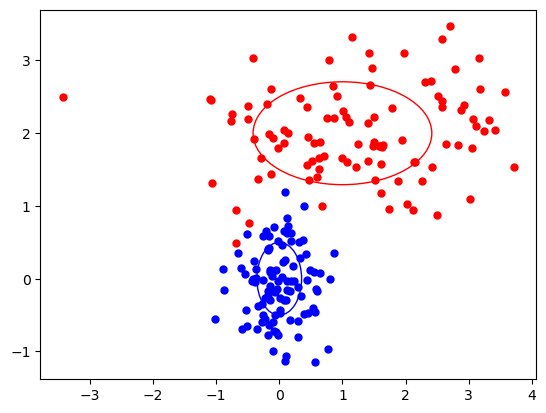

In [13]:
plt.figure()
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
ax = plt.gca()
ax.add_patch(ellipse_blue)
ax.add_patch(ellipse_red)

In [14]:
label_1 = np.ones(100)
label_0 = np.zeros(100)
label_1 = label_1[:,np.newaxis]
label_0 = label_0[:,np.newaxis]

In [15]:
red_data = np.concatenate((gaussian_red, label_1), axis=1)

In [16]:
blue_data = np.concatenate((gaussian_blue, label_0), axis=1)

In [17]:
whole_data = np.vstack((red_data, blue_data))

In [18]:
whole_data = pd.DataFrame(whole_data) #in order to be able to order later or select sepcific columns and values

In [19]:
mean_blue = np.mean(blue_data[:,:2], axis=0)
mean_red = np.mean(red_data[:,:2], axis=0)

In [20]:
cov_blue = np.cov(blue_data[:,:2], rowvar=False)
cov_red = np.cov(red_data[:,:2], rowvar=False)

In [21]:
def classifier_values(m, pi_m, mu_hat_m, sigma_hat_m,x_test):
    """compute the conditional density of y for a certain m given x

    Parameters:
    --------------------------
    m: int
    the class of y
    
    pi_m: float
    the probability of y belonging to the class

    mu_hat_m : array-like object
    the mean of the x's that have a y in the class m

    sigma_hat_m: 2-D array-like object
    the estimated covariance matrix for a certain class

    x_test: array-like object
    test input
    -------------------------
    """
    y = np.log(pi_m)*multivariate_normal.logpdf(x=x_test, mean=mu_hat_m, cov=sigma_hat_m)
    return y

In [22]:
#for the blue ones
dens_for_blue = np.zeros(10000)
for i in range(10000):
    dens_for_blue[i] = classifier_values(m=0,pi_m=1/2,
                                         mu_hat_m=mean_blue,sigma_hat_m=cov_blue,
                                         x_test=whole_space[i,:])

#for the red ones
dens_for_red = np.zeros(10000)
for i in range(10000):
    dens_for_red[i] = classifier_values(m=1,pi_m=1/2,
                                         mu_hat_m=mean_red,sigma_hat_m=cov_red,
                                         x_test=whole_space[i,:])

In [23]:
all_output = np.vstack((dens_for_blue,dens_for_red))
all_output = np.transpose(all_output)

In [24]:
retained_blue = np.empty(shape=(0,2))
retained_red = np.empty(shape=(0,2))

In [25]:
for i in range(10000):
    if all_output[i,0]>all_output[i,1]:
        retained_blue = np.vstack((retained_blue, whole_space[i,:]))
    else:
        retained_red = np.vstack((retained_red, whole_space[i,:]))

/tmp/ipykernel_289/1375695321.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_289/1375695321.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_289/1375695321.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_289/1375695321.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt strin

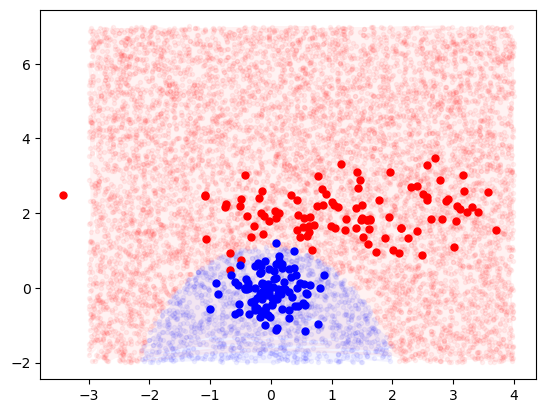

In [26]:
plt.plot(retained_blue[:,0], retained_blue[:,1], alpha=0.05, marker='.', color='r')
plt.plot(retained_red[:,0], retained_red[:,1], alpha=0.05, marker='.', color='b')
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)

# Case of fully labeled data, mulmtiple categories

In [94]:
cov_1 = np.vstack(([1/8,0],[0,1/4]))
mean_1 = np.array(([2,0]))
cov_2 = np.vstack(([1/4,0],[0,1/4]))
mean_2 = np.array(([3,6]))
cov_3 = np.vstack(([1,0],[0,1/2]))
mean_3 = np.array(([-2,4]))
cov_4 = np.vstack(([1,0],[0,1/2]))
mean_4 = np.array(([-2,0]))

In [95]:
gaussian_1 = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=100)
gaussian_2 = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=100)
gaussian_3 = np.random.multivariate_normal(mean=mean_3, cov=cov_3, size=100)
gaussian_4 = np.random.multivariate_normal(mean=mean_4, cov=cov_4, size=100)

In [96]:
list_of_cols = ['b','r','g','m']

In [97]:
list_labeled = [gaussian_1,gaussian_2,gaussian_3,gaussian_4]

/tmp/ipykernel_289/1460800915.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)
/tmp/ipykernel_289/1460800915.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)


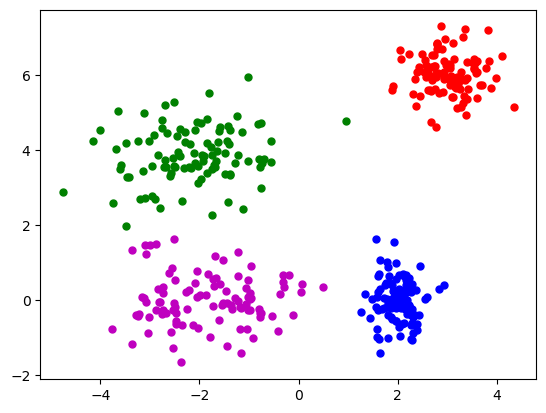

In [98]:
for i in range(4):
    gaussian_distrib = list_labeled[i]
    plt.plot(gaussian_distrib[:,0], gaussian_distrib[:,1], 'bo', color=list_of_cols[i], marker='.', markersize=10)

In [99]:
parameters_estimated = {}
for i in range(4):
    parameters_estimated['mean_{0}'.format(i)] = np.mean(list_labeled[i][:,:], axis=0)
    parameters_estimated['cov_{0}'.format(i)] = np.cov(list_labeled[i][:,:], rowvar=False)

In [100]:
y_values = {}
for category in range(4):
    list_of_output = []
    for i in range(10000):
        y = classifier_values(m=i, pi_m=1/4,
                              mu_hat_m=parameters_estimated[f'mean_{category}'],
                              sigma_hat_m=parameters_estimated[f'cov_{category}'],x_test=whole_space[i,:])
        list_of_output.append(y)
        
    y_values['class_{0}'.format(category)] = list_of_output

In [101]:
total_output = np.zeros((10000,4))

In [102]:
for category in range(4):
    for i in range(10000):
        total_output[i,category] = y_values[f'class_{category}'][i]

In [103]:
total_output

array([[ 10.31474255,  89.27122203,  26.6863687 ,   7.98053373],
       [ 24.99582866,  24.65958875,  25.26766009,  31.53336047],
       [ 36.81609342,  32.53283204,   9.47093452,  25.95539287],
       ...,
       [ 79.55842122,  61.74279527,   4.06806472,  21.16652604],
       [  8.2124299 , 129.36365148,  64.3243147 ,  20.64181868],
       [150.93386305, 183.03645383,  19.21416558,   2.32988468]])

In [112]:
retained_dict = {'0':[], '1':[], '2':[], '3':[]}
for i in range(10000):
    values = total_output[i,:]
    llmax = np.max(values)
    retained_dict[str(np.where(values == llmax)[0][0])].append(whole_space[i,:])
    

In [106]:
to_plot_0 = np.empty((len(retained_dict['0']),2))
to_plot_1 = np.empty((len(retained_dict['1']),2))
to_plot_2 = np.empty((len(retained_dict['2']),2))
to_plot_3 = np.empty((len(retained_dict['3']),2))
for i in range(len(retained_dict['0'])):
    to_plot_0[i] = retained_dict[str(0)][i]
for i in range(len(retained_dict['1'])):
    to_plot_1[i] = retained_dict[str(1)][i]
for i in range(len(retained_dict['2'])):
    to_plot_2[i] = retained_dict[str(2)][i]
for i in range(len(retained_dict['3'])):
    to_plot_3[i] = retained_dict[str(3)][i]

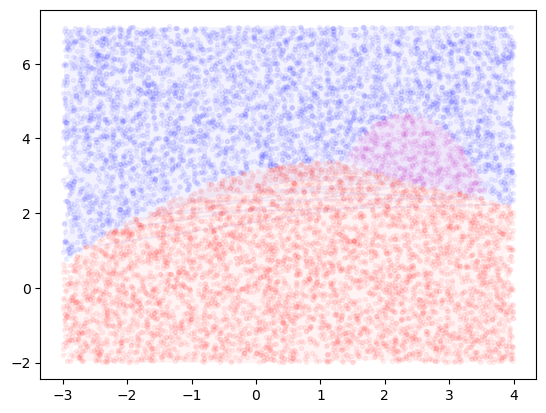

In [116]:
plt.plot(to_plot_0[:,0], to_plot_0[:,1], alpha=0.05, marker='.', color='b')
plt.plot(to_plot_1[:,0], to_plot_1[:,1], alpha=0.05, marker='.', color='r')
#plt.plot(to_plot_2[:,0], to_plot_2[:,1], alpha=0.05, marker='.', color='g')
plt.plot(to_plot_3[:,0], to_plot_3[:,1], alpha=0.05, marker='.', color='m')

In [108]:
list_of_cols

['b', 'r', 'g', 'm']

/tmp/ipykernel_289/1375695321.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_289/1375695321.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
/tmp/ipykernel_289/1375695321.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)
/tmp/ipykernel_289/1375695321.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt strin

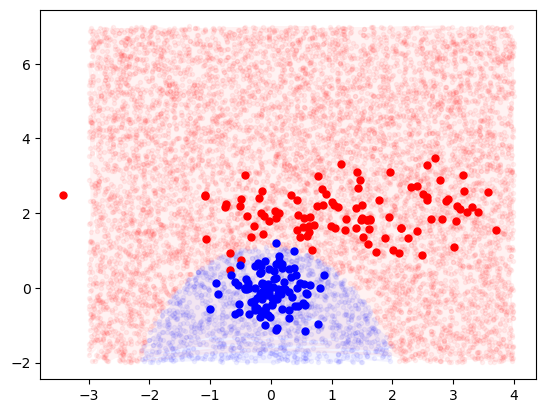

In [109]:
plt.plot(retained_blue[:,0], retained_blue[:,1], alpha=0.05, marker='.', color='r')
plt.plot(retained_red[:,0], retained_red[:,1], alpha=0.05, marker='.', color='b')
plt.plot(gaussian_red[:,0], gaussian_red[:,1], 'bo', color='red', marker='.', markersize=10)
plt.plot(gaussian_blue[:,0], gaussian_blue[:,1], 'bo', color='blue', marker='.', markersize=10)

In [85]:
parameters_estimated

{'mean_0': array([-0.05017145, -0.00205153]),
 'cov_0': array([[0.14592659, 0.01004338],
        [0.01004338, 0.25578372]]),
 'mean_1': array([2.94724755, 6.05677035]),
 'cov_1': array([[0.20009296, 0.03401417],
        [0.03401417, 0.26880685]]),
 'mean_2': array([-1.93251162,  4.00710268]),
 'cov_2': array([[1.58065077, 0.03225368],
        [0.03225368, 0.59435663]]),
 'mean_3': array([-1.99737058,  0.00451677]),
 'cov_3': array([[ 1.10671581, -0.01862418],
        [-0.01862418,  0.61963596]])}

In [88]:
classifier_values(m=1,pi_m=1/4,mu_hat_m=np.array((0.,0.)), sigma_hat_m=np.vstack((np.array((1/8,0)), np.array((0,1/4)))),
                 x_test=[-4,-2])

99.95876754463598

In [111]:
to_plot_2

array([[3.53557755, 2.46675934],
       [3.7926145 , 2.27110795],
       [3.53055391, 2.47846351]])